In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\emili\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Restabelecendo a tabela da aula 6
df_US = df[df['job_country']=='United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns = 'job_title_short', aggfunc = 'size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format ='%B').dt.month  # dt.month extrai apenas os meses das datas
df_US_pivot.sort_values('month_no',inplace = True)
df_US_pivot.set_index('job_posted_month', inplace = True)
df_US_pivot.drop(columns = 'month_no',inplace=True) 

In [ ]:
#Vamos incluir um novo conjunto de dados (fazer uma combinacao de df ou merge)
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv",index_col='job_posted_month')


In [10]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')  # vai combinar colocando os dados de df_US_software_pivot na direita do df
# Vai no panda cheat sheet para tirar duvidas: pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [12]:
# Vamos pegar os top 5 jobs
top_5 = (df_US_merged                       # se coloca em parenteses, pode quebrar por linhas e visualizacao fica mais facil
         .sum()                             # contando numero de jobs
         .sort_values(ascending=False)      # ordem decrescente
         .head()                            # toma os 5 primeiros (5 eh o default)
         .index                             # lista os 5 primeiros e outras informacoes
         .to_list()                         # pega a lista apenas dos jobs
         )


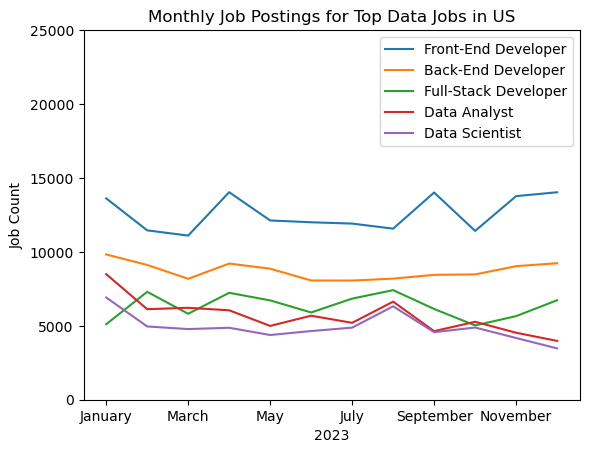

In [17]:
# Fazer o grafico
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in US')
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.ylim(0,25000)
plt.legend()
plt.show()